Student Details:

Name: **Chelliah Kanthanathan**

ID: **18263003**

All necessary imports are provided. Please do not add further imports.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

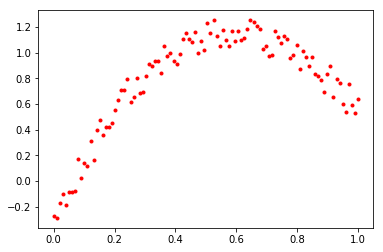

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target
orig_X = X
plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

In [6]:
def calc_eout(w,X,y,pred):
    # Calculate the error as the mean squared error
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
#lambdas = np.linspace(0.001,1, 1000)
#lambdas = [10,5,2,1,0.9,0.8,0.7,0.6, 0.5,0.4,0.3,0.2,.1,0.01,.001]
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001] # 7 values
#lambdas = np.arange(0,1,0.001) # 1000 values 
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

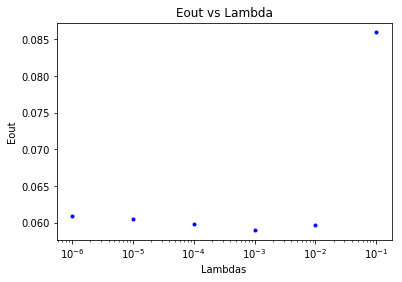

In [9]:
plt.plot(lambdas[1:],eout[1:],'b.')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.xscale('log')
plt.show()

#### It is obvious from plotting that as lambda increases the in and out of sample errors increase. We need to find the sweet spot where as the  lambda does not result in overfitting or underfitting.

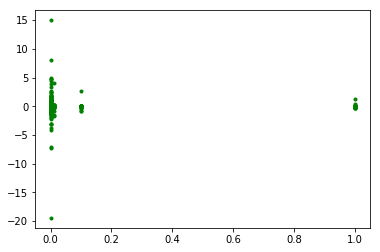

In [10]:
plt.plot(lambdas,weights,'g.')
plt.show()

#### Above plot confirms that as lambda increases the weight coefficient gets closer to zero, In a way it shows that the regularization penalty is evident when lambda is near zero and when lambda is higher i.e. 1 then itdoes not make much difference in weight coefficient and it is nearly zero.

### Find Optimal Lambda

In [11]:
min_eout_index = np.argmin(eout)
print ("Min_Eout_Index:", min_eout_index)
optimal_lambda = lambdas[min_eout_index]
print ("OPTIMAL LAMBDA:",optimal_lambda)

Min_Eout_Index: 3
OPTIMAL LAMBDA: 0.001


### Task 4.1 - Compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [12]:
print('Eout with optimal lambda:',  eout[min_eout_index])
print('Eout with out regularization:',  eout[0])

Eout with optimal lambda: 0.058970188266013024
Eout with out regularization: 0.1505083499221609


#### It is obvious from above eout output that with out regularization the error is very high. This proves that regularization results in better lower error on prediction.

### Task 4.2 A plot showing the estimate of Eout vs lambda on the domain [0,1]


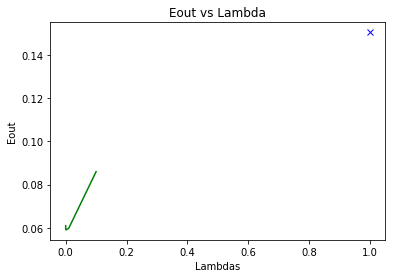

In [13]:
plt.plot(lambdas[0],eout[0],'bx')
plt.plot(lambdas[1:],eout[1:],'g-')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.show()

#### Above plot concludes that eout without regularization resulted in high error blue X, where as with the regularization it resulted in low error green line..

### Task 4.2 A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

In [14]:
 def calc_prediction(weights, X): 
    # Used code from Michel for plotting..Credit goes to him for plotting
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [15]:
def demonstrate_overfitting_and_underfitting(X,y,l,label):
    ein=[]
    eout=[]
    pred=[]

    X_trans = transPoly(X,50)
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    print (w)
    pred=calc_prediction(w,X)
    
    plt.plot(X, y, 'r.')
    plt.plot(X, pred , 'b-')
    title = 'Target function estimation for ' + label + ' and Lambda=' + str(l)
    plt.title(title)
    plt.show()

[ 1.00855228e+01 -9.08821853e+02  1.34694874e+04 -8.15260702e+04
  2.06741080e+05  2.41470232e+05 -3.71799608e+06  1.40385921e+07
 -3.12420206e+07  4.64001709e+07 -4.66015248e+07  2.84862343e+07
 -5.46893011e+06 -4.25830601e+06 -1.22208683e+05  4.51347185e+06
 -3.39351828e+06  8.62670837e+05 -6.96743185e+04  8.53829994e+05
  3.26630769e+05 -9.38754204e+05 -1.11911304e+06  6.53494475e+05
 -4.59088901e+04  6.21604651e+05  1.08324834e+05 -5.41062037e+04
  2.62972328e+05 -7.40741768e+05  8.90797341e+05 -6.01785806e+05
  1.66582101e+05 -8.42695317e+05  1.54923617e+05 -3.68494347e+05
  1.18060704e+06  4.07995780e+05  7.56319542e+04 -8.05226648e+05
 -6.11976605e+05  8.56882505e+05 -8.53226154e+05  6.19914635e+05
 -4.06864695e+04  3.22758932e+05 -5.46995392e+04 -8.16659191e+04
 -3.92072014e+05  1.86059360e+05  5.59265666e+04]


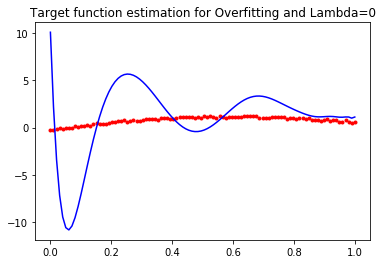

In [16]:
demonstrate_overfitting_and_underfitting(X,y,0,"Overfitting")

[-0.30131247  4.82299447 -3.12059353 -1.89737468 -0.05647323  0.70757123
  0.72644451  0.44576669  0.1242695  -0.12755612 -0.2807967  -0.34375902
 -0.3379781  -0.28671068 -0.2101419  -0.12392213 -0.03921917  0.03663462
  0.09934129  0.14687711  0.17884594  0.19596126  0.19964759  0.19174287
  0.17428242  0.14934652  0.11895663  0.08500799  0.04922918  0.01316105
 -0.02185051 -0.05465231 -0.08427526 -0.10992177 -0.13095093 -0.14686266
 -0.15728161 -0.16194164 -0.16067099 -0.15337854 -0.14004127 -0.12069293
 -0.09541392 -0.06432239 -0.02756637  0.01468292  0.06223699  0.11489499
  0.17244797  0.23468238  0.301383  ]


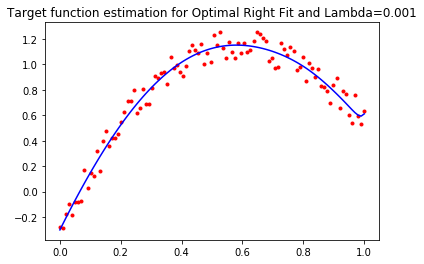

In [17]:
demonstrate_overfitting_and_underfitting(X,y,optimal_lambda,"Optimal Right Fit")

[ 4.45239466e-01  4.80584182e-01  2.25839881e-01  8.69622038e-02
  1.54157247e-02 -2.14442367e-02 -4.00726249e-02 -4.88239508e-02
 -5.21014938e-02 -5.23132784e-02 -5.08175707e-02 -4.83990990e-02
 -4.55188643e-02 -4.24500755e-02 -3.93545394e-02 -3.63268017e-02
 -3.34202741e-02 -3.06630171e-02 -2.80674388e-02 -2.56363374e-02
 -2.33667068e-02 -2.12521495e-02 -1.92844119e-02 -1.74543600e-02
 -1.57525932e-02 -1.41698263e-02 -1.26971171e-02 -1.13259972e-02
 -1.00485369e-02 -8.85736928e-03 -7.74568849e-03 -6.70723118e-03
 -5.73624906e-03 -4.82747621e-03 -3.97609437e-03 -3.17769786e-03
 -2.42825950e-03 -1.72409811e-03 -1.06184797e-03 -4.38430559e-04
  1.48971571e-04  7.02938644e-04  1.22583545e-03  1.71983113e-03
  2.18691714e-03  2.62892349e-03  3.04753344e-03  3.44429680e-03
  3.82064190e-03  4.17788646e-03  4.51724733e-03]


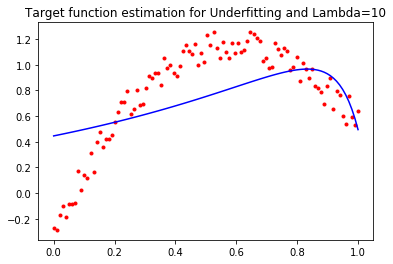

In [18]:
demonstrate_overfitting_and_underfitting(X,y,10,"Underfitting")

### Task 5: Perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [19]:
# Cross validate on list of lambdas
def demonstrate_cross_validation(X,y,lambdas,num_folds=10):
    overall_eout=[]
    
    X_trans = transPoly(X,50)
    
    for lambd in lambdas:
        print("\nLambda: ",lambd)
        ein=[]
        eout=[]
        average_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        fold = 1
        for train_index, test_index in kf.split(X_trans):
            # Training data
            X_train_CV = X_trans[train_index]
            y_train_CV = y[train_index]
    
            # Testing data
            X_test_CV = X_trans[test_index]
            y_test_CV = y[test_index]
   
            w = weights_reg(X_train_CV,y_train_CV,lambd)
            ein.append(calc_error(w,X_train_CV,y_train_CV))
            local_eout = calc_error(w,X_test_CV,y_test_CV)
            eout.append(local_eout)
            print("K-Fold:", fold, ", Eout: ", local_eout)
            fold += 1
        
        average_eout = np.mean(eout)
        print("Average Eout: ",average_eout)
        overall_eout.append(average_eout)
    
    min_overall_eout_index = np.argmin(overall_eout)
    overall_eout_kfold = overall_eout[min_overall_eout_index]
    print ("min_overall_eout_index:", min_overall_eout_index)
    optimal_lambda_CV = lambdas[min_overall_eout_index]
    print ("\n\nOPTIMAL LAMBDA using K-Fold cross validation: {}".format(optimal_lambda_CV))
    
    return optimal_lambda_CV, overall_eout_kfold

In [20]:
lambdas_cv = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
optimal_lambda_CV_after_KFOLD, eout_kfold = demonstrate_cross_validation(X,y,lambdas_cv) # Using original lambdas with 1000 values results in kernel crash..

print ("\nOPTIMAL LAMBDA without K-Fold cross validation: {}".format(optimal_lambda))


Lambda:  1
K-Fold: 1 , Eout:  0.150508349922161
K-Fold: 2 , Eout:  0.15230042487554782
K-Fold: 3 , Eout:  0.15735153545564412
K-Fold: 4 , Eout:  0.18957816742626776
K-Fold: 5 , Eout:  0.2179234184713283
K-Fold: 6 , Eout:  0.10092241126023781
K-Fold: 7 , Eout:  0.3221804357932467
K-Fold: 8 , Eout:  0.2790363088886794
K-Fold: 9 , Eout:  0.17504898357388282
K-Fold: 10 , Eout:  0.12525104173736593
Average Eout:  0.1870101077404362

Lambda:  0.1
K-Fold: 1 , Eout:  0.0859393116671081
K-Fold: 2 , Eout:  0.10768409827573444
K-Fold: 3 , Eout:  0.11744309009575564
K-Fold: 4 , Eout:  0.09939360477584916
K-Fold: 5 , Eout:  0.1138045658079353
K-Fold: 6 , Eout:  0.06087963176795505
K-Fold: 7 , Eout:  0.1742485769479556
K-Fold: 8 , Eout:  0.14433128267259066
K-Fold: 9 , Eout:  0.11485715996001619
K-Fold: 10 , Eout:  0.10011238549947843
Average Eout:  0.11186937074703787

Lambda:  0.01
K-Fold: 1 , Eout:  0.05972197357252715
K-Fold: 2 , Eout:  0.08381775914753965
K-Fold: 3 , Eout:  0.09781023509203593

#### With K FOLD cross validation the optimal lambda is 0.0001 and with out K fold cross validation the optimal lambda is 0.001. Slight variation in finding optimal lambda between methods with or with out K Fold cross validation

### Demonstrate overfitted model, a model with the optimal l, and an underfitted model after K fold CV

[ 1.00855228e+01 -9.08821853e+02  1.34694874e+04 -8.15260702e+04
  2.06741080e+05  2.41470232e+05 -3.71799608e+06  1.40385921e+07
 -3.12420206e+07  4.64001709e+07 -4.66015248e+07  2.84862343e+07
 -5.46893011e+06 -4.25830601e+06 -1.22208683e+05  4.51347185e+06
 -3.39351828e+06  8.62670837e+05 -6.96743185e+04  8.53829994e+05
  3.26630769e+05 -9.38754204e+05 -1.11911304e+06  6.53494475e+05
 -4.59088901e+04  6.21604651e+05  1.08324834e+05 -5.41062037e+04
  2.62972328e+05 -7.40741768e+05  8.90797341e+05 -6.01785806e+05
  1.66582101e+05 -8.42695317e+05  1.54923617e+05 -3.68494347e+05
  1.18060704e+06  4.07995780e+05  7.56319542e+04 -8.05226648e+05
 -6.11976605e+05  8.56882505e+05 -8.53226154e+05  6.19914635e+05
 -4.06864695e+04  3.22758932e+05 -5.46995392e+04 -8.16659191e+04
 -3.92072014e+05  1.86059360e+05  5.59265666e+04]


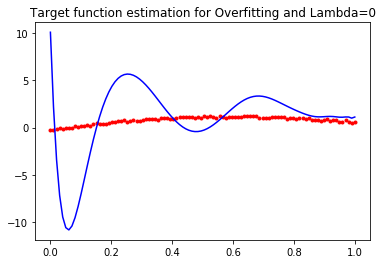

In [21]:
demonstrate_overfitting_and_underfitting(X,y,0,"Overfitting")

[-0.3167168   4.98184493 -3.09362966 -3.07818039  0.39366481  1.73147135
  1.45228604  0.62583206 -0.15957133 -0.69191565 -0.9477641  -0.97777117
 -0.85103076 -0.63172217 -0.37129237 -0.10744358  0.13425801  0.3380342
  0.4955875   0.60411067  0.66467185  0.68094865  0.65825856  0.60283011
  0.52126565  0.42015481  0.30580546  0.18406537  0.06021353 -0.06109605
 -0.17585155 -0.28067237 -0.37277842 -0.44994652 -0.5104589  -0.55304786
 -0.57683949 -0.58129856 -0.56617609 -0.53146062 -0.47733367 -0.40412975
 -0.312301   -0.20238631 -0.0749847   0.06926717  0.22971397  0.40569717
  0.59656763  0.80169551  1.02047788]


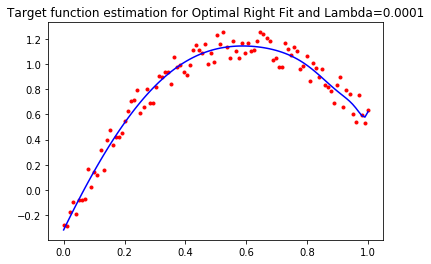

In [22]:
demonstrate_overfitting_and_underfitting(X,y,optimal_lambda_CV_after_KFOLD,"Optimal Right Fit")

[ 4.45239466e-01  4.80584182e-01  2.25839881e-01  8.69622038e-02
  1.54157247e-02 -2.14442367e-02 -4.00726249e-02 -4.88239508e-02
 -5.21014938e-02 -5.23132784e-02 -5.08175707e-02 -4.83990990e-02
 -4.55188643e-02 -4.24500755e-02 -3.93545394e-02 -3.63268017e-02
 -3.34202741e-02 -3.06630171e-02 -2.80674388e-02 -2.56363374e-02
 -2.33667068e-02 -2.12521495e-02 -1.92844119e-02 -1.74543600e-02
 -1.57525932e-02 -1.41698263e-02 -1.26971171e-02 -1.13259972e-02
 -1.00485369e-02 -8.85736928e-03 -7.74568849e-03 -6.70723118e-03
 -5.73624906e-03 -4.82747621e-03 -3.97609437e-03 -3.17769786e-03
 -2.42825950e-03 -1.72409811e-03 -1.06184797e-03 -4.38430559e-04
  1.48971571e-04  7.02938644e-04  1.22583545e-03  1.71983113e-03
  2.18691714e-03  2.62892349e-03  3.04753344e-03  3.44429680e-03
  3.82064190e-03  4.17788646e-03  4.51724733e-03]


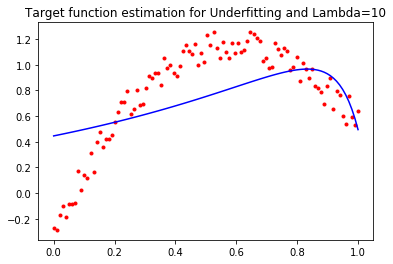

In [23]:
demonstrate_overfitting_and_underfitting(X,y,10,"Underfitting")

### Task 6 - Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected? Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

### RidgeCV performs L2 regularization

In [24]:
lambdas_RCV = np.arange(0, 1, 0.001)
#alpha = lambdas_RCV # 1000 values
alpha = lambdas # 7 values
fold = 10 # used 10 folds to compare cross validation with Task 5

clf_RCV = RidgeCV(alphas=alpha, cv=fold) #, normalize=True) # Try normalize

# Fit the Data
clf_RCV.fit(X_trans, y)

# Score and Prediction
score_RCV = clf_RCV.score(X_trans,y) 
predictions_RCV = clf_RCV.predict(X_trans)

# Calculate Eout
eout_RCV = calc_eout(clf_RCV.coef_,X_trans,y,predictions_RCV)

print("\nregularization parameter", clf_RCV.alpha_)
print("\nscore :", score_RCV)
print("\neout :", eout_RCV)
print("\nweight vector :", clf_RCV.coef_)


regularization parameter 0.01

score : 0.9618263465515632

eout : 0.07695832377473873

weight vector : [ 0.00000000e+00  4.05199340e+00 -1.63448569e+00 -1.63515146e+00
 -7.64295213e-01 -1.38446564e-01  1.73941460e-01  2.81291363e-01
  2.80154353e-01  2.31445339e-01  1.68672800e-01  1.08344256e-01
  5.73749347e-02  1.76386700e-02 -1.14225438e-02 -3.13729744e-02
 -4.40431027e-02 -5.11729584e-02 -5.42629725e-02 -5.45325896e-02
 -5.29312909e-02 -5.01720821e-02 -4.67718014e-02 -4.30905279e-02
 -3.93666775e-02 -3.57466383e-02 -3.23089371e-02 -2.90834489e-02
 -2.60663516e-02 -2.32315566e-02 -2.05392858e-02 -1.79423841e-02
 -1.53908602e-02 -1.28350600e-02 -1.02278001e-02 -7.52571900e-03
 -4.69005154e-03 -1.68698419e-03  1.51228686e-03  4.93170159e-03
  8.59061596e-03  1.25041636e-02  1.66836610e-02  2.11370290e-02
  2.58692106e-02  3.08825729e-02  3.61772837e-02  4.17516590e-02
  4.76024771e-02  5.37252610e-02  6.01145273e-02]


#### The optimal lambda identified by RidgeCV is 0.01 that is different from methods with or without K Folds CV. The weight vector is same in size with the above methods that identified optimal lambda. RidgeCV used all the features as none of the weight coefficient is zero.

### LassoCV performs L1 regularization

In [25]:
lambdas_LCV = np.arange(0, 1, 0.001)
#alpha = lambdas_LCV # 1000 values
alpha = lambdas # 7 values
fold = 10 # used 10 folds to compare cross validation with Task 5

clf_LCV = LassoCV(alphas=alpha, cv=fold) #, normalize=True) # Try normalize

# Fit the Data
clf_LCV.fit(X_trans, y)

# Score and Prediction
score_LCV = clf_LCV.score(X_trans,y) 
predictions_LCV = clf_LCV.predict(X_trans)

# Calculate Eout
eout_LCV = calc_eout(clf_LCV.coef_,X_trans,y,predictions_LCV)

print("\nregularization parameter", clf_LCV.alpha_)
print("\nscore :", score_LCV)
print("\neout :", eout_LCV)
print("\nweight vector :", clf_LCV.coef_)


regularization parameter 0.0001

score : 0.9648367818794357

eout : 0.07386148650670027

weight vector : [ 0.          4.74195514 -3.60439882 -0.47683374 -0.          0.
  0.          0.          0.10267886  0.05876398  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.05467747]


#### The optimal lambda identified by LassoCV is 0.0001 that is exactly same as in K Folds CV. 

### Weight coefficient comparison between RidgeCV and LassoCV



#### The weight coefficient have exactly zero, Out of 50 features only 6 features was selected. The weight coefficient for 44 features are zero. This shows that the LassoCV excluded 44 features. With transpoly method the data X was transformed to higher degree polynomial with 50 degrees. So the datas have to be highly correalted. But still LassoCV excluded few features which could be a disadvantage. So use RidgeCV for datasets with highly correlated features and LassoCV for datsets with any less correlated features.¶

### Resulting Eout Comparison for different methods

In [26]:
print('\nEout with out regularization:',  eout[0])
print('\nEout with optimal lambda:',  eout[min_eout_index])
print('\nEout with optimal lambda from KFOLD:',  eout_kfold)
print("\nEout RidgeCV :", eout_RCV)
print("\nEout LassoCV :", eout_LCV)


Eout with out regularization: 0.1505083499221609

Eout with optimal lambda: 0.058970188266013024

Eout with optimal lambda from KFOLD: 0.08132948613542437

Eout RidgeCV : 0.07695832377473873

Eout LassoCV : 0.07386148650670027


#### The above resulting eout show that the Eout with out any regularization is very high compared to eout from models that use regularization. Out of the models that use regularization the eout found using method with out kfold is lowest one and then the next best model for lowest eout is using LassoCV. The Eout found suing ridge CV and method with Kfold CV are higher than other methods